In [1]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#Model Capacity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#pandas dataframe 설정
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [4]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


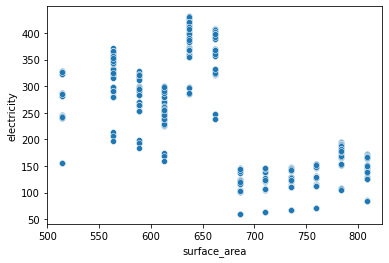

In [5]:
#산점도

sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

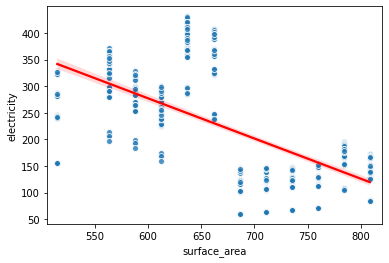

In [8]:
#1차 모델 시각화 
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color': 'red'}, scatter_kws ={'edgecolor': 'white'})
plt.xlim(505, 820)
plt.show()

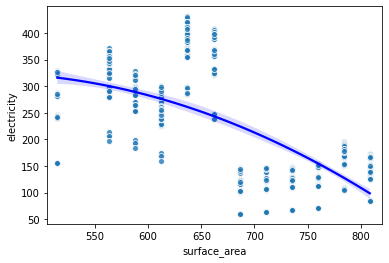

In [9]:
#2차 모델 시각화
sns.regplot(x ='surface_area', y = 'electricity', data = Elec, 
            line_kws ={'color': 'blue'},
            scatter_kws ={'edgecolor': 'white'},
            order = 2)
plt.xlim(505, 820)
plt.show()

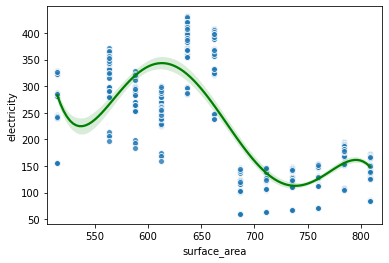

In [11]:
#5차 모델 시각화
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws ={'color': 'green'},
            scatter_kws ={'edgecolor':'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

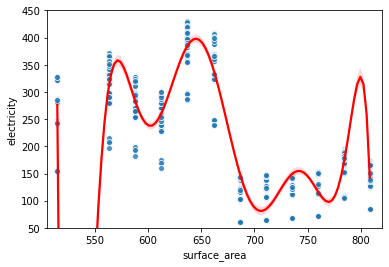

In [13]:
#9차 모델 시각화
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, 
            line_kws = {'color': 'red'},
            scatter_kws ={'edgecolor': 'white'},
            order = 9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

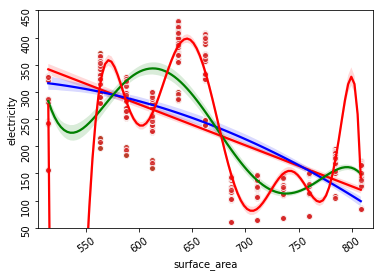

In [14]:
# 4개 모델 비교 시각화
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, 
            line_kws = {'color': 'red'}, 
            scatter_kws ={'edgecolor': 'white'})

sns.regplot(x ='surface_area', y = 'electricity', data = Elec, 
            line_kws ={'color': 'blue'},
            scatter_kws ={'edgecolor': 'white'},
            order = 2)

sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws ={'color': 'green'},
            scatter_kws ={'edgecolor':'white'},
            order = 5)

sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, 
            line_kws = {'color': 'red'},
            scatter_kws ={'edgecolor': 'white'},
            order = 9)

plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

In [15]:
#Trainning Error
#1차 모델 Trainning Error
x_train = Elec[['surface_area']]
y_train = Elec[['electricity']]

x_train.shape, y_train.shape

((768, 1), (768, 1))

In [16]:
#모델 생성
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(x_train, y_train)

LinearRegression()

In [17]:
#모델 정보(학습결과) 확인
print(Model_1.coef_)
print(Model_1.intercept_)

[[-0.75387157]]
[729.4538243]


In [18]:
#예측값 생성
y_hat_1 = Model_1.predict(x_train)
len(y_hat_1)

768

In [21]:
#MSE 계산

TR_Err_1 = np.mean((y_train- y_hat_1)**2)
TR_Err_1

electricity    5763.983779
dtype: float64

In [24]:
#5차 모델 Training Error
#다항 차수 변환
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
Px_5 = poly.fit_transform(x_train)
Px_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [26]:
x_train.shape, Px_5.shape

((768, 1), (768, 5))

In [27]:
#5차 모델 생성
from sklearn.linear_model import LinearRegression
Model_5 = LinearRegression()
Model_5.fit(Px_5, y_train)

LinearRegression()

In [28]:
#모델 정보 확인
np.set_printoptions(suppress = True, precision = 40)
print(Model_5.coef_)
print(Model_5.intercept_)

[[-0.00031551482066185534       -0.1029296835336089
   0.00037876155771186435       -0.0000005032064365372355
   0.00000000022980592429000524]]
[2906.2216253808647]


In [29]:
#예측값 생성
Px_5_pred = poly.fit_transform(x_train)
y_hat_5 = Model_5.predict(Px_5_pred)
y_hat_5.shape

(768, 1)

In [30]:
#MSE 계산
TR_Err_5 = np.mean((y_train - y_hat_5)**2)
TR_Err_5

electricity    4177.726329
dtype: float64

In [31]:
#9차 모델 Training Error
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9, include_bias = False)
Px_9= poly.fit_transform(x_train)

In [32]:
x_train.shape, Px_9.shape

((768, 1), (768, 9))

In [33]:
#모델 생성
from sklearn.linear_model import LinearRegression
Model_9 = LinearRegression()
Model_9.fit(Px_9, y_train)

LinearRegression()

In [34]:
#모델 정보 확인
print(Model_9.coef_)
print(Model_9.intercept_)

[[ 0.0000000000000000000000000479174184634688
   0.0000000000000000040128728976712735
   0.000000000000000000019806870398781567
   0.000000000000000009606888487135083
   0.0000000000000031773264060317083
   0.0000000000006336691113703143
  -0.0000000000000022880589639802964
   0.000000000000000002775149473685744
  -0.0000000000000000000011271003952673454   ]]
[-440.08258373868114]


In [35]:
Px_9_pred = poly.fit_transform(x_train)
y_hat_9 = Model_9.predict(Px_9_pred)
y_hat_9.shape

(768, 1)

In [36]:
#MSE 계산
TR_Err_9 = np.mean((y_train - y_hat_9)**2)
TR_Err_9

electricity    4086.719991
dtype: float64

In [37]:
#3개 모델 Training Error 비교
print('1차 모델', TR_Err_1)
print('5차 모델', TR_Err_5)
print('9차 모델', TR_Err_9)

1차 모델 electricity    5763.983779
dtype: float64
5차 모델 electricity    4177.726329
dtype: float64
9차 모델 electricity    4086.719991
dtype: float64


In [38]:
#Testing Error
#Train_data and Test_data split 80% 20%
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, test_size = 0.2, random_state = 2045)

In [39]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

In [40]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


In [41]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Elec[['surface_area']],Elec[['electricity']], 
                                                    test_size=0.2, random_state = 2045)

In [44]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 1), (614, 1), (154, 1), (154, 1))

In [45]:
x_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


In [46]:
y_train.head()

,electricity
555,145.5
355,389.8
200,264.4
669,163.5
561,147.0


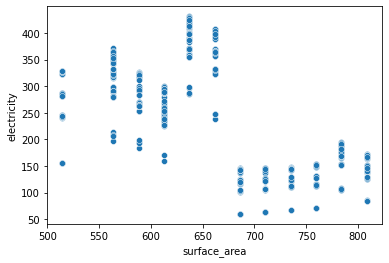

In [47]:
#Distribution Visualization
sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

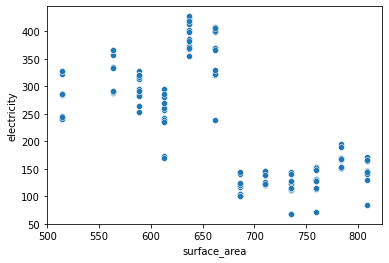

In [48]:
sns.scatterplot(TE_Elec['surface_area'], TE_Elec['electricity'])
plt.show()

In [49]:
#1차 모델 Testing Error
#모델 생성
from sklearn.linear_model import LinearRegression
Model_1 = LinearRegression()
Model_1.fit(x_train, y_train)

LinearRegression()

In [51]:
#Test_Data로 예측값 생성
y_hat_1 = Model_1.predict(x_test)
y_hat_1.shape

(154, 1)

In [52]:
#Test_Data로 MSE 계산
from sklearn.metrics import mean_squared_error
TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

In [53]:
#5차 모델 Testing Error
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree = 5, include_bias = False)
Px_5_TR = poly.fit_transform(x_train)

In [56]:
from sklearn.linear_model import LinearRegression
Model_5 = LinearRegression()
Model_5.fit(Px_5_TR, y_train)

LinearRegression()

In [57]:
Px_5_TE = poly.fit_transform(x_test)
y_hat_5 = Model_5.predict(Px_5_TE)

In [65]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4238.6890671375695

In [59]:
#9차 모델 Testing Error
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 9, include_bias = False)
Px_9_TR = poly.fit_transform(x_train)

In [60]:
from sklearn.linear_model import LinearRegression
Model_9 = LinearRegression()
Model_9.fit(Px_9_TR, y_train)

LinearRegression()

In [63]:
Px_9_TE = poly.fit_transform(x_test)
y_hat_9 = Model_9.predict(Px_9_TE)

In [64]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.6890671375695

In [66]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4238.6890671375695
9차 모델 :  4238.6890671375695


In [67]:
#Train vs. Validation vs. Test
X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], 
                                                      Elec['electricity'], 
    test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)
print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


In [69]:
#60%, 20%, 20%
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain, 
                                                      test_size = int(len(Elec) * 0.2), 
                                                      random_state = 2045)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


In [70]:
#5차 모델
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

In [71]:
PX_5_VD = poly.fit_transform(X_valid)
y_hat_5 = Model_5.predict(PX_5_VD)
from sklearn.metrics import mean_squared_error
MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.431259340615

In [72]:
#9차 모델 Validation Error
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

In [73]:
PX9_valid = poly.fit_transform(X_valid)
y_hat_9 = Model_9.predict(PX9_valid)
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733124900854

In [74]:
#2개 모델 Validation Error 비교
print('5차 모델 MSE_5  : ', MSE_5)
print('9차 모델 MSE_9  : ', MSE_9)

5차 모델 MSE_5  :  4136.431259340615
9차 모델 MSE_9  :  3955.9733124900854


In [76]:
#Test_Data로 Y_hat(예측값) 생성 및 MSE 계산
PX9_TE = poly.fit_transform(X_test)
mean_squared_error(y_test, Model_9.predict(PX9_TE))

4220.8857321070645